- To load the IMDB dataset using TensorFlow, you can use the tf.keras.datasets.imdb.load_data function. This dataset consists of 25,000 movie reviews from IMDB, labeled by sentiment (positive/negative). Use as below:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
imdb = tf.keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

print(train_data.shape, test_data.shape)

(25000,) (25000,)


In [3]:
print(type(train_data))
print('train- test')
for x in zip(train_data[0], test_data[0]):
    print(str(x[0]).rjust(4),"-",str(x[1]).rjust(4))

<class 'numpy.ndarray'>
train- test
   1 -    1
  14 -  591
  22 -  202
  16 -   14
  43 -   31
 530 -    6
 973 -  717
1622 -   10
1385 -   10
  65 -    2
 458 -    2
4468 -    5
  66 -    4
3941 -  360
   4 -    7
 173 -    4
  36 -  177
 256 - 5760
   5 -  394
  25 -  354
 100 -    4
  43 -  123
 838 -    9
 112 - 1035
  50 - 1035
 670 - 1035
   2 -   10
   9 -   10
  35 -   13
 480 -   92
 284 -  124
   5 -   89
 150 -  488
   4 - 7944
 172 -  100
 112 -   28
 167 - 1668
   2 -   14
 336 -   31
 385 -   23
  39 -   27
   4 - 7479
 172 -   29
4536 -  220
1111 -  468
  17 -    8
 546 -  124
  38 -   14
  13 -  286
 447 -  170
   4 -    8
 192 -  157
  50 -   46
  16 -    5
   6 -   27
 147 -  239
2025 -   16
  19 -  179
  14 -    2
  22 -   38
   4 -   32
1920 -   25
4613 - 7944
 469 -  451
   4 -  202
  22 -   14
  71 -    6
  87 -  717


In [4]:
'''
numpy.apply_along_axis(func1d, axis, arr, *args, **kwargs)

func1dfunction (M,) -> (Nj…)
    This function should accept 1-D arrays. It is applied to 1-D slices of arr along the specified axis.
axisinteger
    Axis along which arr is sliced.
arrndarray (Ni…, M, Nk…)
    Input array.
argsany
    Additional arguments to func1d.
kwargsany
    Additional named arguments to func1d.
'''
np.apply_along_axis(np.max, axis=0, arr=train_data)

array([   1, 9995,    2,    7, 2208, 7335, 3135, 4173, 3783,  509, 1683,
       4702,    2,    2,    6,  201,    7, 6415,  687,    2,    2,    7,
       6387,  548,  139, 7583,  295,   34, 4485, 5302,    2,    2,    2,
          7,    2,    2,  146,   24, 1017, 2282,  133,   21,    4, 1591,
       3113,  786,    2,   16,  125,    4,    2, 9790, 2039,  137,  267,
          2,    5,    2,  120, 2024,  980,    2, 1248, 5666,  727, 1405,
       6879, 1060, 6442,   18,    2, 1461,    2, 1883,  445,  109, 5369,
       3696,   33,  236,  786, 5580, 7994,    8,    2,    2,  103,    2,
         98,   11,    2, 1461,   24,   66,  351, 1461,  165,  116,   17,
       2545,   18, 6717, 8694, 5514,  980, 2545,  165,  734,   18, 2311,
         52,   84,  157,   18, 7232,   11,  661,    8,  607, 3531,  223,
       1066,  445, 9236,  996,    8, 2898, 4931,    8, 5526, 8316, 7880,
        154,  378,  459,   18, 6942,  632,    5,   79, 2024,   18,   68,
       4918,  813, 2456,    2,   17,  840, 4807, 38

In [5]:
#convert the array to a 1d array containing all the word repetition counts
train_data_1d = np.concatenate([np.array(sublist) for sublist in train_data])
train_data_1d.shape

(5967841,)

In [6]:
#Load the IMDB dataset, keeping only the top 10,000 most frequently occurring words.
train_data_1d=np.sort(train_data_1d)[::-1]
train_data_1d[:10000]

array([9999, 9999, 9999, ..., 9683, 9683, 9683])

In [7]:
from keras.preprocessing.sequence import pad_sequences

In [8]:
#Find how many unique values are in target data, with counts
unique, counts = np.unique(train_labels, return_counts=True)
print(unique, counts)

[0 1] [12500 12500]


In [9]:
unique, counts = np.unique(test_labels, return_counts=True)
print(unique, dict(zip(unique,counts)))

[0 1] {0: 12500, 1: 12500}


## Check the distribution of label data

Text(0.5, 1.0, 'Test Data')

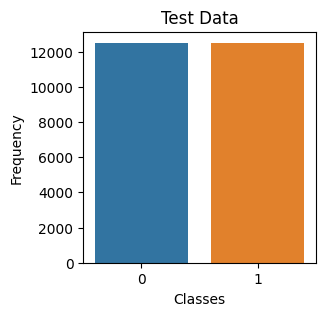

In [22]:
plt.figure(figsize=(3,3))
sns.countplot(data=pd.DataFrame(test_labels), x=0)
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Test Data')

Text(0.5, 1.0, 'Test Data')

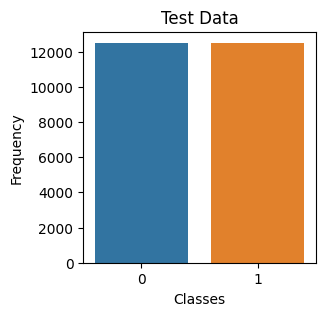

In [11]:
plt.figure(figsize=(3,3))
sns.countplot(data=pd.DataFrame(train_labels), x=0)
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Test Data')

In [12]:
review_len_train = []
review_len_test = []
for i,j in zip(train_data,test_data):
    review_len_train.append(len(i))
    review_len_test.append(len(j))
print("min: ", min(review_len_train), "max: ", max(review_len_train))
print("min: ", min(review_len_test), "max: ", max(review_len_test))

min:  11 max:  2494
min:  7 max:  2315


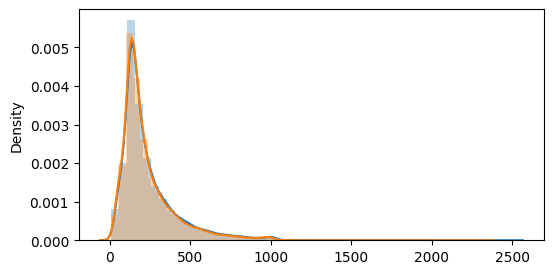

In [13]:
plt.figure(figsize=(6,3))
sns.distplot(review_len_train,hist_kws={"alpha":0.3});
sns.distplot(review_len_test,hist_kws={"alpha":0.3});


In [14]:
word_index = imdb.get_word_index()
print(type(word_index))

<class 'dict'>


In [15]:
cnt=0
for x in word_index:
    print(x.ljust(10),str(word_index[x]).rjust(8))
    if cnt>3: break 
    else: cnt+=1

fawn          34701
tsukino       52006
nunnery       52007
sonja         16816
vani          63951


In [16]:
for keys,values in word_index.items():
    if values == 1:
        print(keys)

the


In [17]:
#create 2 lists for the key value pairs
decode_words=list(word_index.keys())
decode_words_pos=list(word_index.values())
print(decode_words[:5])
decode_words_pos[:5]


['fawn', 'tsukino', 'nunnery', 'sonja', 'vani']


[34701, 52006, 52007, 16816, 63951]

In [86]:
def f_decode(arr, k):
    output=''
    for x in arr[k]:
        y=x-3 if x-3>1 else 0
        #output+= (decode_words[decode_words_pos.index(y)], end=' ') if y>0 else ('!', end =' ') 
        output+= (decode_words[decode_words_pos.index(y)] if y>0 else '!') +' '
    return output
print(f_decode(train_data,0))


! this film was just brilliant casting location scenery story direction everyone's really suited ! part they played and you could just imagine being there robert ! is an amazing actor and now ! same being director ! father came from ! same scottish island as myself so i loved ! fact there was a real connection with this film ! witty remarks throughout ! film were great it was just brilliant so much that i bought ! film as soon as it was released for ! and would recommend it to everyone to watch and ! fly fishing was amazing really cried at ! end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ! to ! two little boy's that played ! ! of norman and paul they were just brilliant children are often left out of ! ! list i think because ! stars that play them all grown up are such a big profile for ! whole film but these children are amazing and should be praised for what they have done don't you think ! whole story was so love

In [87]:
##Alternatively
reverse_index = dict([(value,key) for (key,value) in word_index.items()])
def whatItSay(index=0, arr=train_data):
    decode_review = " ".join([reverse_index.get(i-3, "!") for i in arr[index]])
    return decode_review

decoded_review = whatItSay()
decoded_review

"! this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ! is an amazing actor and now the same being director ! father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ! and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ! to the two little boy's that played the ! of norman and paul they were just brilliant children are often left out of the ! list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [67]:
print(whatItSay(3))

! the ! ! at storytelling the traditional sort many years after the event i can still see in my ! eye an elderly lady my friend's mother retelling the battle of ! she makes the characters come alive her passion is that of an eye witness one to the events on the ! heath a mile or so from where she lives br br of course it happened many years before she was born but you wouldn't guess from the way she tells it the same story is told in bars the length and ! of scotland as i discussed it with a friend one night in ! a local cut in to give his version the discussion continued to closing time br br stories passed down like this become part of our being who doesn't remember the stories our parents told us when we were children they become our invisible world and as we grow older they maybe still serve as inspiration or as an emotional ! fact and fiction blend with ! role models warning stories ! magic and mystery br br my name is ! like my grandfather and his grandfather before him our prota

## Preprocessing of data

In [74]:
#Load the IMDB dataset, keeping only the top 10,000 most frequently occurring words
word_size = 10000
(X_train,Y_train),(X_test,Y_test) = imdb.load_data(num_words=word_size)
print(X_train.shape, len(Y_test))

(25000,) 25000


In [76]:
print(X_train[0],sep=' ')

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [77]:
#Pad the sequences so that they all have the same length
pad_length=130
X_train = pad_sequences(X_train, maxlen=pad_length)
X_test  = pad_sequences(X_test, maxlen=pad_length)

print(X_train.shape, X_test.shape)

(25000, 130) (25000, 130)


In [78]:
X_train[0]

array([  62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
         16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
          5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
         22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
          2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
       3766,    5,  723,   36,   71,   43,  530,  476,   26,  400,  317,
         46,    7,    4,    2, 1029,   13,  104,   88,    4,  381,   15,
        297,   98,   32, 2071,   56,   26,  141,    6,  194, 7486,   18,
          4,  226,   22,   21,  134,  476,   26,  480,    5,  144,   30,
       5535,   18,   51,   36,   28,  224,   92,   25,  104,    4,  226,
         65,   16,   38, 1334,   88,   12,   16,  283,    5,   16, 4472,
        113,  103,   32,   15,   16, 5345,   19,  178,   32])

In [80]:
for i in X_train[0:10]:
    print(len(i), end=', ')

130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 

In [91]:
f_decode(X_train,5)

"! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! begins better than it ends funny that ! russian submarine crew ! all other actors it's like those scenes where documentary shots br br spoiler part ! message ! was contrary to ! whole story it just does not ! br br "

In [92]:
whatItSay(5,X_train)

"! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! begins better than it ends funny that the russian submarine crew ! all other actors it's like those scenes where documentary shots br br spoiler part the message ! was contrary to the whole story it just does not ! br br"

## RNN model

In [95]:
from scipy import stats
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences 
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense,Activation
from keras.layers import Embedding

In [98]:
rnn = Sequential()

rnn.add(Embedding(word_size,32,input_length =len(X_train[0]))) # num_words=10000)
rnn.add(SimpleRNN(16,input_shape = (word_size,pad_length), return_sequences=False,activation="relu"))
rnn.add(Dense(1)) #flatten
rnn.add(Activation("sigmoid")) #using sigmoid for binary classification

print(rnn.summary())
rnn.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 130, 32)           320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 16)                784       
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 320801 (1.22 MB)
Trainable params: 320801 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [106]:
#Run the training for 10 epochs.
history = rnn.fit(X_train,Y_train,validation_data = (X_test,Y_test),epochs = 10,batch_size=128,verbose = 1)

Epoch 1/10
196/196 [==============================] - 5s 27ms/step - loss: 0.2764 - accuracy: 0.8912 - val_loss: 0.4209 - val_accuracy: 0.8217
Epoch 2/10
196/196 [==============================] - 5s 26ms/step - loss: 0.2530 - accuracy: 0.9000 - val_loss: 0.4244 - val_accuracy: 0.8238
Epoch 3/10
196/196 [==============================] - 5s 26ms/step - loss: 0.2339 - accuracy: 0.9091 - val_loss: 0.5666 - val_accuracy: 0.7700
Epoch 4/10
196/196 [==============================] - 5s 25ms/step - loss: 0.2167 - accuracy: 0.9167 - val_loss: 0.3817 - val_accuracy: 0.8460
Epoch 5/10
196/196 [==============================] - 5s 27ms/step - loss: 0.2042 - accuracy: 0.9231 - val_loss: 0.3896 - val_accuracy: 0.8486
Epoch 6/10
196/196 [==============================] - 5s 27ms/step - loss: 0.1857 - accuracy: 0.9299 - val_loss: 0.3846 - val_accuracy: 0.8449
Epoch 7/10
196/196 [==============================] - 5s 27ms/step - loss: 0.1752 - accuracy: 0.9337 - val_loss: 0.4547 - val_accuracy: 0.8484

In [107]:
score = rnn.evaluate(X_test,Y_test)

782/782 [==============================] - 4s 5ms/step - loss: 0.4236 - accuracy: 0.8458


In [108]:
print("accuracy:", round(score[1]*100,2),"\b%")

accuracy: 84.58 %


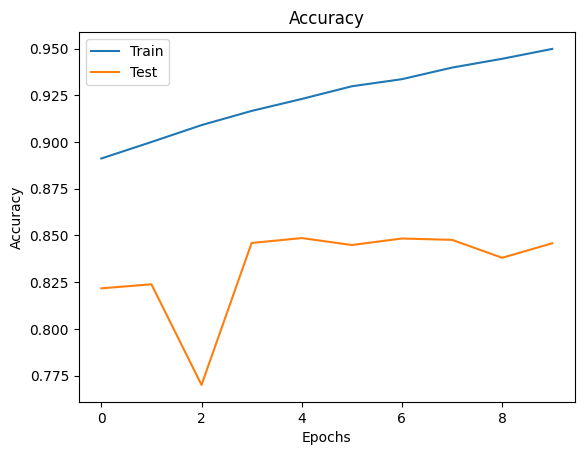

In [109]:
plt.figure()
plt.plot(history.history["accuracy"],label="Train");
plt.plot(history.history["val_accuracy"],label="Test");
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show();

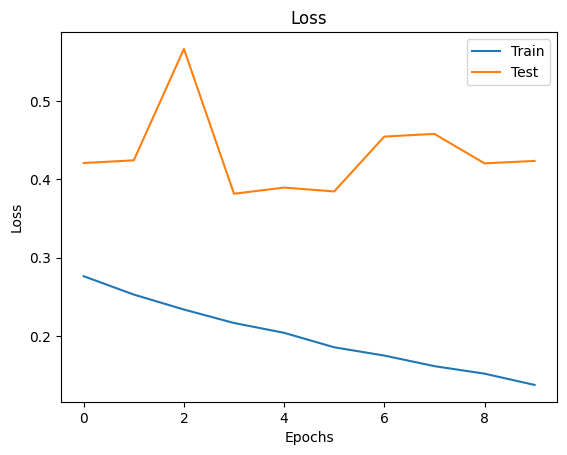

In [110]:
plt.figure()
plt.plot(history.history["loss"],label="Train");
plt.plot(history.history["val_loss"],label="Test");
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show();